## Intro to Data Analysis

### Virtual Environments & APIs

In [1]:
# sending a request and logging the response code
import requests
r = requests.get("https://api.github.com/users/Connor-SM")
print( r )
print( type(r) )

<Response [200]>
<class 'requests.models.Response'>


In [2]:
# accessing the content that we requested from our URL
data = r.content
print( data )

b'{"login":"Connor-SM","id":20958711,"node_id":"MDQ6VXNlcjIwOTU4NzEx","avatar_url":"https://avatars.githubusercontent.com/u/20958711?v=4","gravatar_id":"","url":"https://api.github.com/users/Connor-SM","html_url":"https://github.com/Connor-SM","followers_url":"https://api.github.com/users/Connor-SM/followers","following_url":"https://api.github.com/users/Connor-SM/following{/other_user}","gists_url":"https://api.github.com/users/Connor-SM/gists{/gist_id}","starred_url":"https://api.github.com/users/Connor-SM/starred{/owner}{/repo}","subscriptions_url":"https://api.github.com/users/Connor-SM/subscriptions","organizations_url":"https://api.github.com/users/Connor-SM/orgs","repos_url":"https://api.github.com/users/Connor-SM/repos","events_url":"https://api.github.com/users/Connor-SM/events{/privacy}","received_events_url":"https://api.github.com/users/Connor-SM/received_events","type":"User","site_admin":false,"name":"Connor Milliken","company":"HubSpot, Inc.","blog":"www.connormilliken.c

In [4]:
# converting data from JSON into a python dictionary and outputting all key-value pairs
data = r.json()
for k,v in data.items():
    print( "Key:{}\tValue:{}".format(k,v) )
print( data['name'] )

Key:login	Value:Connor-SM
Key:id	Value:20958711
Key:node_id	Value:MDQ6VXNlcjIwOTU4NzEx
Key:avatar_url	Value:https://avatars.githubusercontent.com/u/20958711?v=4
Key:gravatar_id	Value:
Key:url	Value:https://api.github.com/users/Connor-SM
Key:html_url	Value:https://github.com/Connor-SM
Key:followers_url	Value:https://api.github.com/users/Connor-SM/followers
Key:following_url	Value:https://api.github.com/users/Connor-SM/following{/other_user}
Key:gists_url	Value:https://api.github.com/users/Connor-SM/gists{/gist_id}
Key:starred_url	Value:https://api.github.com/users/Connor-SM/starred{/owner}{/repo}
Key:subscriptions_url	Value:https://api.github.com/users/Connor-SM/subscriptions
Key:organizations_url	Value:https://api.github.com/users/Connor-SM/orgs
Key:repos_url	Value:https://api.github.com/users/Connor-SM/repos
Key:events_url	Value:https://api.github.com/users/Connor-SM/events{/privacy}
Key:received_events_url	Value:https://api.github.com/users/Connor-SM/received_events
Key:type	Value:Us

In [8]:
# outputting specific key-value pairs form JSON
r = requests.get("https://api.github.com/search/repositories?q=language:python")
data = r.json()
print(data['total_count'])

8109501


#### Monday Exercises

In [16]:
# use API requests
r = requests.get('https://api.github.com/search/repositories?q=language:javascript')
data = r.json()
print( data['total_count'] )

16297170


### Pandas

In [2]:
# importing pandas library
import pandas as pd
import os
import sys
os.path.dirname(sys.executable)

'C:\\Projects\\python_bootcamp\\.venv\\Scripts'

In [4]:
# using the from_dict method to create a pandas data frame from a dictionary
import random
random.seed(3)
names = ["Jess","Jordan","Sandy","Ted","Barney","Tyler","Rebecca"]
age = [random.randint(18,35) for x in range( len(names) )]
people = {'names':names,'ages':age}
df = pd.DataFrame.from_dict(people)
print(df)

     names  ages
0     Jess    25
1   Jordan    35
2    Sandy    22
3      Ted    29
4   Barney    33
5    Tyler    20
6  Rebecca    18


In [5]:
# directly accessing a column in pandas
print( df['names'] )
print( df['names'][3] )    # accesses fourth row (zero index) in column 'names'
# print( df[4] )    # 4 is not a column name

0       Jess
1     Jordan
2      Sandy
3        Ted
4     Barney
5      Tyler
6    Rebecca
Name: names, dtype: object
Ted


In [6]:
# directly selecting a record (row) using .loc[]
print( df.loc[0] )
print( df.loc[0]['names'])

names    Jess
ages       25
Name: 0, dtype: object
Jess


In [7]:
# slicing a data frame to grab specific records
print( df[2:5] )

    names  ages
2   Sandy    22
3     Ted    29
4  Barney    33


In [8]:
# accessing the top five records using the .head() method
df.head()

names  ages
0    Jess    25
1  Jordan    35
2   Sandy    22
3     Ted    29
4  Barney    33

In [9]:
# accessing the bottom three records using the .tail method
df.tail(3)

names  ages
4   Barney    33
5    Tyler    20
6  Rebecca    18

In [10]:
# accessing column headers using the .keys() method
headers = df.keys()
print( headers )

Index(['names', 'ages'], dtype='object')


In [11]:
# checking the shape of the data frame ( # of rows and # of columns )
print( df.shape )

(7, 2)


In [12]:
# checking general statistics using the .describe() method, only works for numerical columns
print( df.describe() )

            ages
count   7.000000
mean   26.000000
std     6.531973
min    18.000000
25%    21.000000
50%    25.000000
75%    31.000000
max    35.000000


In [13]:
# sort the data frame based on the value of a certain columns using the .sort_values() method
df = df.sort_values('ages')
df.head(5)

names  ages
6  Rebecca    18
5    Tyler    20
2    Sandy    22
0     Jess    25
3      Ted    29

In [14]:
# using conditionals to create a boolean list
can_drink = df['ages'] > 21
print( can_drink )

6    False
5    False
2     True
0     True
3     True
4     True
1     True
Name: ages, dtype: bool


In [15]:
# using subsetting to filter out records while keeping data frame intact
df[df['ages'] > 21]

names  ages
2   Sandy    22
0    Jess    25
3     Ted    29
4  Barney    33
1  Jordan    35

In [16]:
# generate a new column of fake data for each record in the data frame
random.seed(321)
tenure = [random.randint(0,10) for x in range( len(df) )]
df['tenure'] = tenure
df.head()

names  ages  tenure
6  Rebecca    18       4
5    Tyler    20       6
2    Sandy    22       2
0     Jess    25       5
3      Ted    29       8

In [17]:
# feature engineering a new column using a UDF
def ageGroup(age):
    return 'Teenager' if age < 21 else 'Adult'
df['age_group'] = df['ages'].apply(ageGroup)
df.head(10)

names  ages  tenure age_group
6  Rebecca    18       4  Teenager
5    Tyler    20       6  Teenager
2    Sandy    22       2     Adult
0     Jess    25       5     Adult
3      Ted    29       8     Adult
4   Barney    33       7     Adult
1   Jordan    35       5     Adult

In [18]:
# grouping the records together to count how many records exist in each group
df.groupby("age_group",as_index = False).count().head()

age_group  names  ages  tenure
0     Adult      5     5       5
1  Teenager      2     2       2

In [19]:
# grouping data to see averages of all columns
df.groupby('age_group',as_index = False).mean().head()

age_group  ages  tenure
0     Adult  28.8     5.4
1  Teenager  19.0     5.0

In [20]:
# grouping information by their age group, then by their tenure
df.groupby(['age_group','tenure'],as_index = False).count().head(10)

age_group  tenure  names  ages
0     Adult       2      1     1
1     Adult       5      2     2
2     Adult       7      1     1
3     Adult       8      1     1
4  Teenager       4      1     1
5  Teenager       6      1     1

In [21]:
# adding a record to the bottom of the data frame
df.loc[7] = [25,"Jess",2,"Adult"]
df.head(10)

names  ages  tenure age_group
6  Rebecca    18       4  Teenager
5    Tyler    20       6  Teenager
2    Sandy    22       2     Adult
0     Jess    25       5     Adult
3      Ted    29       8     Adult
4   Barney    33       7     Adult
1   Jordan    35       5     Adult
7       25  Jess       2     Adult

In [22]:
# removing duplicates based on the same names
df.drop_duplicates(subset = 'names')
df.head(10)

names  ages  tenure age_group
6  Rebecca    18       4  Teenager
5    Tyler    20       6  Teenager
2    Sandy    22       2     Adult
0     Jess    25       5     Adult
3      Ted    29       8     Adult
4   Barney    33       7     Adult
1   Jordan    35       5     Adult
7       25  Jess       2     Adult

In [24]:
# creating a new data frame to work with
ratings = {
    "names":["Jess","Tyler","Ted"],
    'ratings':[10,9,6]
}
ratings = df.from_dict(ratings)
ratings.head()

names  ratings
0   Jess       10
1  Tyler        9
2    Ted        6

In [25]:
# performing an inner join with our df data frame and 
matched_ratings = df.merge(ratings,on = 'names',how = 'inner')
matched_ratings.head()

names ages  tenure age_group  ratings
0  Tyler   20       6  Teenager        9
1   Jess   25       5     Adult       10
2    Ted   29       8     Adult        6

In [26]:
# performing outer join
all_ratings = df.merge(ratings,on = 'names',how = 'outer')
all_ratings.head()

names ages  tenure age_group  ratings
0  Rebecca   18       4  Teenager      NaN
1    Tyler   20       6  Teenager      9.0
2    Sandy   22       2     Adult      NaN
3     Jess   25       5     Adult     10.0
4      Ted   29       8     Adult      6.0

### Matplotlib

In [3]:
# importing matplotlib library
from matplotlib import pyplot as plt    # industry standard name

#### Line Plots

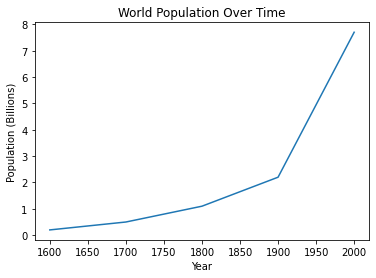

In [4]:
# creating a line plot using x and y coordinates
x , y = [ 1600,1700,1800,1900,2000 ] , [ 0.2,0.5,1.1,2.2,7.7]
plt.plot(x,y)    # creates the line
plt.title("World Population Over Time")    # creates the title
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.show()

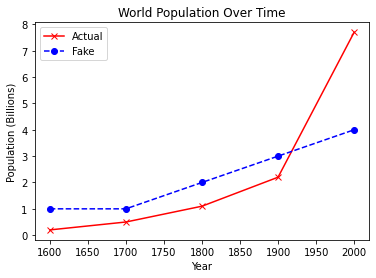

In [6]:
# creating a line plot using x and y coordinates
x1 , y1 = [ 1600,1700,1800,1900,2000 ] , [ 0.2,0.5,1.1,2.2,7.7]
x2 , y2 = [1600,1700,1800,1900,2000] , [ 1,1,2,3,4 ]

plt.plot(x1,y1,"rx-",label = "Actual")    # creates a red solid line with x dots
plt.plot(x2,y2,"bo--",label = "Fake")    # creates a blue dashed line with round dots

plt.title("World Population Over Time")    # creates the title
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.legend()    # plots legend

plt.show()

#### Bar Plots

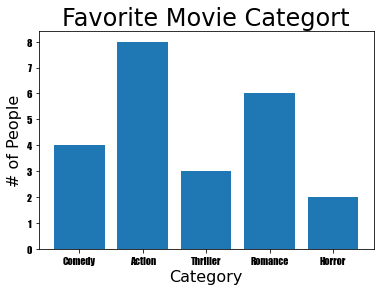

In [7]:
# creating a bar plot using x and y records
num_people , categories = [4,8,3,6,2] , ["Comedy","Action","Thriller","Romance","Horror"]
plt.bar(categories,num_people)
plt.title("Favorite Movie Categort",fontsize = 24)
plt.xlabel("Category",fontsize = 16)
plt.ylabel("# of People",fontsize = 16)
plt.xticks(fontname = "Fantasy")
plt.yticks(fontname = "Fantasy")
plt.show()

#### Boxplots

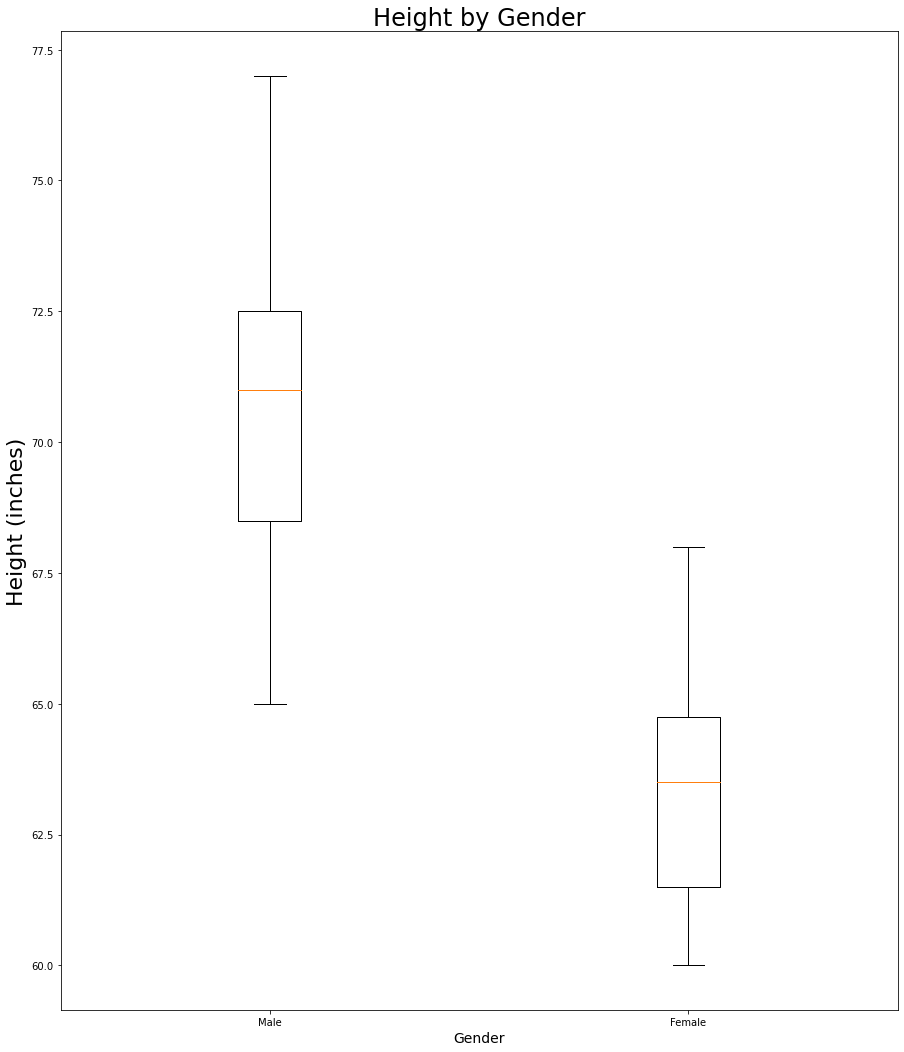

In [9]:
# creating a box plot showing the heights of males and females
males , females = [72,68,65,77,73,71,69] , [60,65,68,61,63,64]
heights = [males,females]
plt.figure(figsize = (15,18))
plt.boxplot(heights)    # takes in a list, which in this case contains two arrays that each contain height data
plt.xticks([1,2],['Male','Female'])
plt.title("Height by Gender",fontsize = 24)
plt.ylabel("Height (inches)",fontsize = 22)
plt.xlabel("Gender",fontsize = 14)
plt.show()

#### Scatter Plots

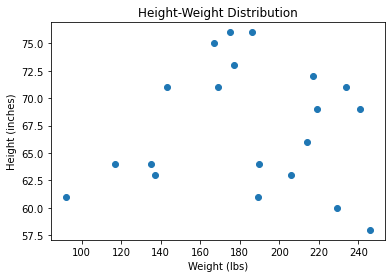

In [11]:
# creating a scatter plot of height - weight data
from random import randint
#random.seed(2)
height = [randint(58,78) for x in range(20)]
weight = [randint(90,250) for x in range(20)]

plt.scatter(weight,height)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.show()

#### Histograms

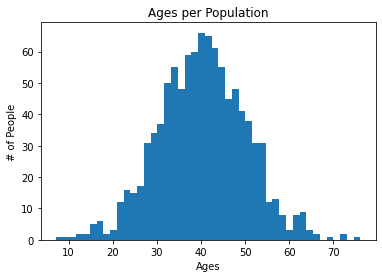

In [12]:
# creating a histogram to show age data for a fake population
import numpy as np
np.random.seed(5)
ages = [np.random.normal(loc = 40,scale = 10) for x in range(1000)]
plt.hist(ages,bins = 45)    # bins is the number of bars
plt.title("Ages per Population")
plt.xlabel("Ages")
plt.ylabel("# of People")
plt.show()

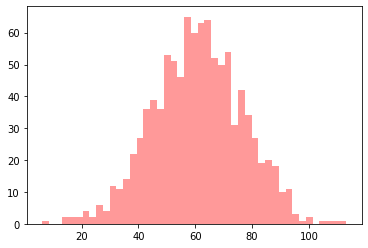

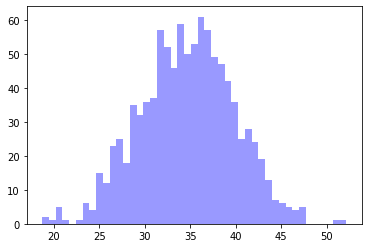

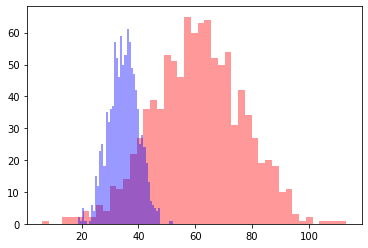

In [14]:
# showing the importance of histograms to display central distribution
florida = [np.random.normal(loc = 60,scale = 15) for x in range(1000)]
california = [np.random.normal(loc = 35,scale = 5) for x in range(1000)]
# chart 1
plt.hist(florida,bins = 45,color = "r",alpha = 0.4)
plt.show()
#chart 2
plt.hist(california,bins = 45,color = "b",alpha = 0.4)
plt.show()
# chart 3
plt.hist(florida,bins = 45,color = 'r',alpha = 0.4)
plt.hist(california,bins = 45,color = 'b',alpha = 0.4)
plt.show()

#### Saving Plots

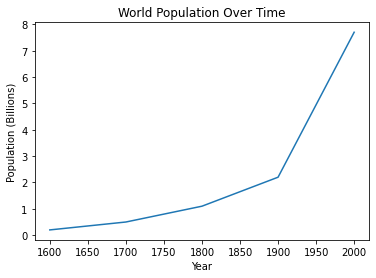

In [15]:
# using savefig() method to save a plot image
x , y = [ 1600,1700,1800,1900,2000 ] , [ 0.2,0.5,1.1,2.2,7.7]
plt.plot(x,y)    # creates the line
plt.title("World Population Over Time")    # creates the title
plt.xlabel("Year")
plt.ylabel("Population (Billions)")
plt.savefig("population.jpg")

#### Flattening Data

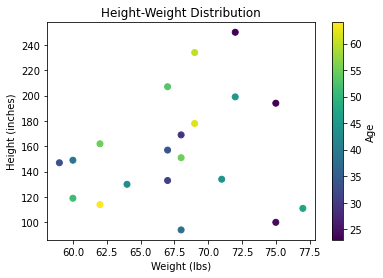

In [16]:
# creating a scatter plot of height-weight-age data
height = [randint(58,78) for x in range(20)]
weight = [randint(90,250) for x in range(20)]
age = [randint(18,65) for x in range(20)]

plt.scatter(height,weight,c = age)
plt.title("Height-Weight Distribution")
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (inches)")
plt.colorbar(label = "Age")
plt.show()

#### Wednesday Exercises

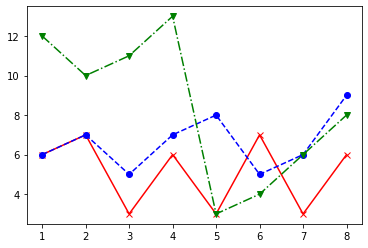

In [18]:
# making three line plots
x = [1,2,3,4,5,6,7,8]
y1 = [randint(2,7) for x in range(8)]
y2 = [randint(5,10) for x in range(8)]
y3 = [randint(1,13) for x in range(8)]

plt.plot(x,y1,"rx-")
plt.plot(x,y2,"bo--")
plt.plot(x,y3,color = "g", linestyle = "dashdot",marker = "v")
plt.show()

How do you rank this movie (1-5)?2
is there another person to give a rating (y/n)?y
How do you rank this movie (1-5)?4
is there another person to give a rating (y/n)?y
How do you rank this movie (1-5)?3
is there another person to give a rating (y/n)?n


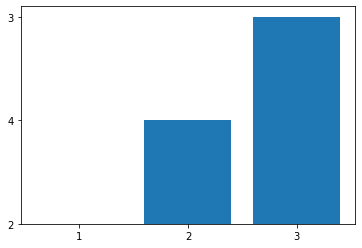

In [20]:
# plot movie rankings
def movieRating():
    more = True
    ratings = {}
    while more:
        rating = input("How do you rank this movie (1-5)?")
        ratings[str(len(ratings) + 1)] = rating
        if input("Is there another person to give a rating (y/n)?".lower()) == 'n':
                 more = False
    plt.bar(ratings.keys(),ratings.values())
    plt.show()

movieRating()

### Web Scraping

In [1]:
# importing Beautiful Soup and requests library
from bs4 import BeautifulSoup
import requests

In [3]:
# performing a request and outputting the status code
page = requests.get("http://www.arthurleej.com/e-love.html")
print(page)
print(page.content)

<Response [200]>
b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\r<html>\r<head>\r\t<title>Essay on Love by Arthur Lee Jacobson</title>\r<meta name="description" content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson.">\r<meta name="keywords" content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington">\r<meta name="resource-type" content="document">\r<meta name="generator" content="BBEdit 4.5">\r<meta name="robots" content="all">\r<meta name="classification" content="Gardening">\r<meta name="distribution" content="global">\r<meta name="rating" content="general">\r<meta name="copyright" content="2001 Arthur Lee Jacobson">\r<meta name="author" content="eriktyme@eriktyme.com">\r<meta name="language" content="en-us">\r</head>\r<body background="images/background1a.jpg" bgcolor="#FFFFCC" text="#

In [4]:
# turning the response into a BeautifulSoup object to parse the data
soup = BeautifulSoup(page.content,'html.parser')
print( soup.prettify() )

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

In [7]:
# using the find method to find the first text with the bold hashtag
title = soup.find("b")
print(title)
print(title.get_text())    # gets all the text

<b>Love</b>
Love


In [9]:
# get all the text with the bold tag
poem_text = soup.find_all("b")
print(poem_text)
for text in poem_text:
    print(text.get_text())

[<b>Love</b>, <b>    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?</b>, <b>    Love in its broad sense is the feeling of strong attraction, and often attachment and protection. It is felt towards other people, towards pets, towards inanimate objects, towards abstractions such as patriotism, religious matters, hobbies, and I suppose nearly everything. It is multifaceted, and includes ordinary self-love, chivalrous love, carnal or sexual love, friendly love, family love. It is an emotion that is closely related to certain others, such as hope. At its simplest level it is what we strongly like.</b>, <b>    I have a hunch that love, like the rose, owes much o

In [10]:
# finding an element by specific attribute key:values
page = requests.get("https://github.com/Connor-SM")
soup = BeautifulSoup(page.content,"html.parser")
username = soup.find("span",attrs = {"class":"vcard-username"})
print( username )
print( username.get_text() )

<span class="p-nickname vcard-username d-block" itemprop="additionalName">
          Connor-SM

        </span>

          Connor-SM

        


In [11]:
# traversing the DOM using BeautifulSoup - using the children method
page = requests.get("http://www.arthurleej.com/e-love.html")
soup = BeautifulSoup(page.content,"html.parser")
print(soup.children)

In [12]:
# understanding the children within the soup object
for child in soup.children:
    print( type(child) )

<class 'bs4.element.Doctype'>
<class 'bs4.element.NavigableString'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In [13]:
# trying to access the .Tag object which holds the html - accessing the title tag
html = list(soup.children)[2]
for section in html:
    print("\n\nNew Section")
    print(section)



New Section
 


New Section
<head> <title>Essay on Love by Arthur Lee Jacobson</title> <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/> <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/> <meta content="document" name="resource-type"/> <meta content="BBEdit 4.5" name="generator"/> <meta content="all" name="robots"/> <meta content="Gardening" name="classification"/> <meta content="global" name="distribution"/> <meta content="general" name="rating"/> <meta content="2001 Arthur Lee Jacobson" name="copyright"/> <meta content="eriktyme@eriktyme.com" name="author"/> <meta content="en-us" name="language"/> </head>


New Section
 


New Section
<body alink="#33CC33" background="images/background1a.jpg" bgcolor="#FFFFCC" link="#0000FF" text=

In [14]:
# accessing the head element using the children attribute
head = list(html.children)[1]
for item in head:
    print("\n\nNew Tag")
    print(item)



New Tag
 


New Tag
<title>Essay on Love by Arthur Lee Jacobson</title>


New Tag
 


New Tag
<meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>


New Tag
 


New Tag
<meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>


New Tag
 


New Tag
<meta content="document" name="resource-type"/>


New Tag
 


New Tag
<meta content="BBEdit 4.5" name="generator"/>


New Tag
 


New Tag
<meta content="all" name="robots"/>


New Tag
 


New Tag
<meta content="Gardening" name="classification"/>


New Tag
 


New Tag
<meta content="global" name="distribution"/>


New Tag
 


New Tag
<meta content="general" name="rating"/>


New Tag
 


New Tag
<meta content="2001 Arthur Lee Jacobson" name="copyright"/>


New Tag
 


New Tag
<meta content="eriktyme@

In [15]:
# scraping the title text
title = list(head)[1]
print(title.string)
print( type(title.string) )
print( title.get_text())

Essay on Love by Arthur Lee Jacobson
<class 'bs4.element.NavigableString'>
Essay on Love by Arthur Lee Jacobson


#### Thursday Exercises

In [48]:
# stadium names
page = requests.get("https://en.wikipedia.org/wiki/List_of_current_National_Football_League_stadiums")
soup = BeautifulSoup(page.content,"html.parser")
html = list(soup.children)[2]
body = list(html.children)[3]
script = list(body.children)[4]
vector = list(script.children)[9]
bodycontent = list(vector.children)[13]
parser = list(bodycontent.children)[0]
tbl = list(parser.children)[16]
for tag in tbl:
    print("\n\nNew Tag")
    print(tag)



New Tag
<a href="/wiki/Stadium" title="Stadium">Stadiums</a>


New Tag
 represent a considerable expense to a community, and thus their construction, use, and funding often enter the public discourse.


New Tag
<sup class="reference" id="cite_ref-Economist_1-0"><a href="#cite_note-Economist-1">[1]</a></sup>


New Tag
 Also, given the perceived 


New Tag
<a href="/wiki/Home_advantage" title="Home advantage">advantage</a>


New Tag
 a team gets to playing in its home stadium, particular attention is given in the media to the peculiarities of each stadium's environment. Climate, playing surface (either natural or 


New Tag
<a href="/wiki/Artificial_turf" title="Artificial turf">artificial turf</a>


New Tag
), and the type of roof all contribute to giving each team its home-field advantage.



### Friday Exercise

In [1]:
# importing all necessary libraries
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Comment
from IPython.display import clear_output
test = "www.microsoft.com/en-us"

Enter a website to analyze: https://www.microsoft.com/en-us
The top word is ('Microsoft', 40)


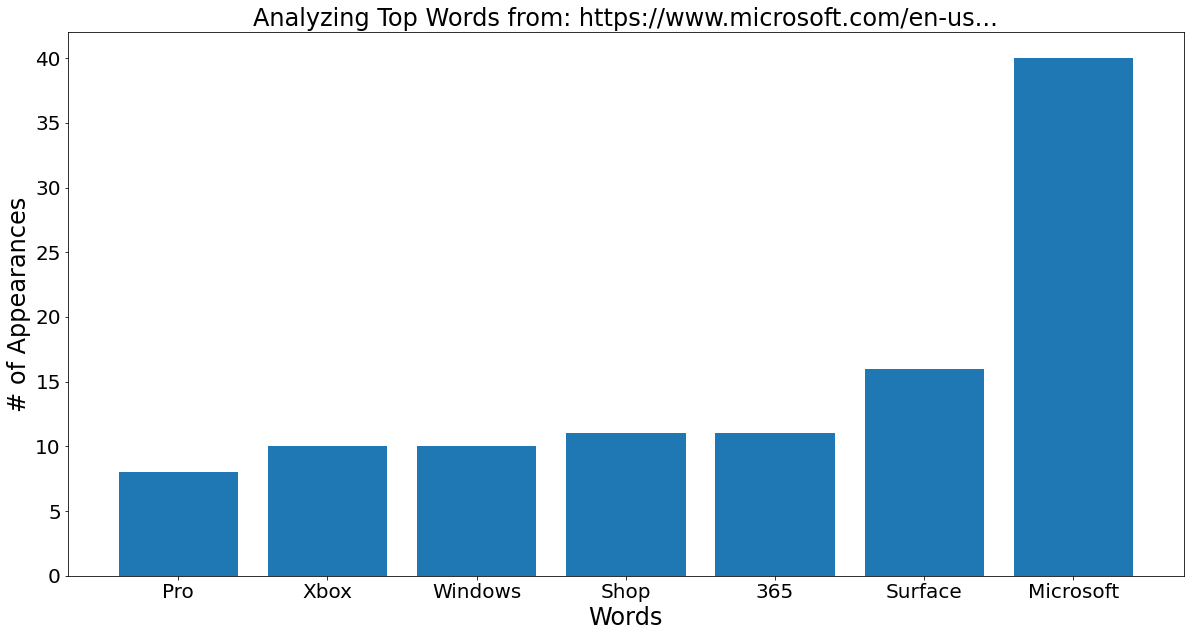

Would you like to scrape a website (y/n)?n
Thank you for analyzing! Please come back again!


In [16]:
# graph results of top seven words
def displayResults(words, site):
    count = [item[1] for item in words][::-1]
    word = [item[0] for item in words][::-1]
    
    plt.figure(figsize = (20,10))
    
    plt.bar( word , count )
    
    plt.title("Analyzing Top Words from: {}...".format(site[:50]),fontname = "Sans Serif",fontsize = 24)
    plt.xlabel("Words",fontsize = 24)
    plt.ylabel("# of Appearances",fontsize = 24)
    plt.xticks(fontname = "Sans Serif",fontsize = 20)
    plt.yticks(fontname = "Sans Serif",fontsize = 20)
    
    plt.show()
    
# filter article words and hidden characters
def filterWaste(word):
    bad_words = ['the','a','in','of','to','you','\xa0','and','at','on','for','from','is','that','his',
                'are','be','-','as','&','they','with','how','was','her','him','i','has','|']
    
    if word.lower() in bad_words:
        return False
    else:
        return True

# filter out elements that don't appear on the site page
def filterTags(element):
    if element.parent.name in ['style','script','head','title','meta','[document]']:
        return False
    
    if isinstance(element,Comment):
        return False
    
    return True

# scrape website and return 7 most used words
def scrape(site):
    page = requests.get(site)
    
    soup = BeautifulSoup(page.content,"html.parser")
    
    text = soup.find_all( text = True )
    
    visible_text = filter(filterTags,text)
    
    word_count = {}
    
    for text in visible_text:
        words = text.replace('\n','').replace('\t','').split(' ')
        
        words = list( filter(filterWaste,words) )
        
        for word in words:
            if word != "":
                if word in word_count:
                    word_count[ word ] += 1
                else:
                    word_count[ word ] = 1
                    
    word_count = sorted(word_count.items(),key = lambda kv:kv[1],reverse = True)
    
    return word_count[:7]
    
# main loop
while input("Would you like to scrape a website (y/n)?").lower() == 'y':
    
    try:
        clear_output()
        site = input("Enter a website to analyze: ")
        
        top_words = scrape(site)
        
        top_word = top_words[0]
        
        print("The top word is {}".format(top_word))
        
        displayResults(top_words,site)
        
    except:
        print("Something went wrong. Please try again.")
print("Thank you for analyzing! Please come back again!")
